In [3]:
if(False):
    !pip install huggingface_hub
    !huggingface-cli scan-cache

    !pip install opencv-python pycocotools matplotlib onnxruntime onnx
    !pip install pytorch torchvision
    !git clone -b main https://github.com/open-mmlab/mmsegmentation.git
    !cd mmsegmentation
    !pip install -v -e .
    !pip install -U openmim
    !mim install mmengine
    !mim install "mmcv>=2.0.0"
    # '-v' means verbose, or more output
    # '-e' means installing a project in editable mode,
    # thus any local modifications made to the code will take effect without reinstallation.
    %cd ./mmsegmentation
    !pwd
    !pip install -v -e .
    !mkdir ../checkpoints
    !wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r50-d8_512x1024_40k_cityscapes/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth -P ../checkpoints

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 701.2/701.2 kB 5.4 MB/s eta 0:00:00m eta 0:00:010:01:01
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mmcv 2.0.0 requires Pillow, which is not installed.
REPO ID         REPO TYPE SIZE ON DISK NB FILES LAST_ACCESSED LAST_MODIFIED REFS LOCAL PATH                                                 
--------------- --------- ------------ -------- ------------- ------------- ---- ---------------------------------------------------------- 
bert-base-cased model           436.4M        5 1 day ago     1 day ago     main /home/james/.cache/huggingface/hub/models--bert-base-cased 

Done in 0.0s. Scanned 1 repo(s) for a total of 436.4M.
Got 1 warning(s) while scanning. Use -vvv to print details.
  Using cached pycocotools-2.0.6.tar.gz (24 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... do

In [1]:
import torch
import mmcv
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot
# CHECK CUDA_TORCH STATUS
import torchvision
print(f"torch cuda availability: {torch.cuda.is_available()}")
print(f"torch version: {torchvision.__version__}")
print(f"something: {torch.zeros(1).cuda()}")

/mnt/B69AD3A69AD36183/miniconda3/envs/CV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


torch cuda availability: True
torch version: 0.14.0+cu117


RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [7]:
config_file = '../configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
checkpoint_file = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

In [ ]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

/media/james/Works/Project/AI/SEGMENT/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/media/james/Works/Project/AI/SEGMENT/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth


In [ ]:
# test a single image
img = 'demo.png'
img = './bladeRunner2049_landscape.jpg'
# img = '/mnt/B69AD3A69AD36183/Projects/ROBOT_GMAP_IP/img/output/image/robot_view.jpg'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)

05/24 10:03:35 - mmengine - WARNING - `Visualizer` backend is not initialized because save_dir is None.


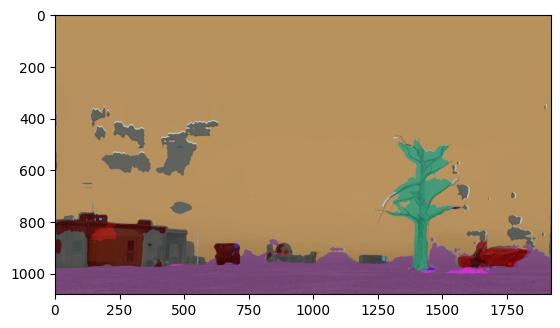

In [ ]:
# show the results
vis_result = show_result_pyplot(model, img, result,opacity=0.8)
plt.imshow(mmcv.bgr2rgb(vis_result))

In [ ]:
# test a single image
img = 'iccv09Data/images/6000074.jpg'

# img = '/mnt/B69AD3A69AD36183/Projects/ROBOT_GMAP_IP/img/output/image/robot_view.jpg'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)
result = inference_model(model, img)
# show the results
vis_result = show_result_pyplot(model, img, result,opacity=0.8)
plt.imshow(mmcv.bgr2rgb(vis_result))

# EVAL OLD METHOD

In [1]:
import mmcv
import mmengine
import matplotlib.pyplot as plt

/mnt/B69AD3A69AD36183/miniconda3/envs/CV/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Custom Data

In [2]:
# define dataset root and directory for images and annotations
data_root = 'iccv09Data'
img_dir = '/media/james/Works/Project/AI/SEGMENT/datasets/iccv09Data/images'
ann_dir = '/media/james/Works/Project/AI/SEGMENT/datasets/iccv09Data/labels'
# define class and palette for better visualization
classes = ('sky', 'tree', 'road', 'grass', 'water', 'bldg', 'mntn', 'fg obj')
# palette = [[128, 128, 128], [129, 127, 38], [120, 69, 125], [53, 125, 34], 
#            [0, 11, 123], [118, 20, 12], [122, 81, 25], [241, 134, 51]]
palette = [[255,8, 8],[133,255,169], [108,98,156],[0,156,135], 
           [0, 11, 123], [118, 20, 12], [122, 81, 25], [217,96,26]]
import os.path as osp
import numpy as np
from PIL import Image

# convert dataset annotation to semantic segmentation map
for file in mmengine.scandir(osp.join(data_root, ann_dir), suffix='.regions.txt'):
  seg_map = np.loadtxt(osp.join(data_root, ann_dir, file)).astype(np.uint8)
  seg_img = Image.fromarray(seg_map).convert('P')
  seg_img.putpalette(np.array(palette, dtype=np.uint8))
  seg_img.save(osp.join(data_root, ann_dir, file.replace('.regions.txt', 
                                                         '.png')))

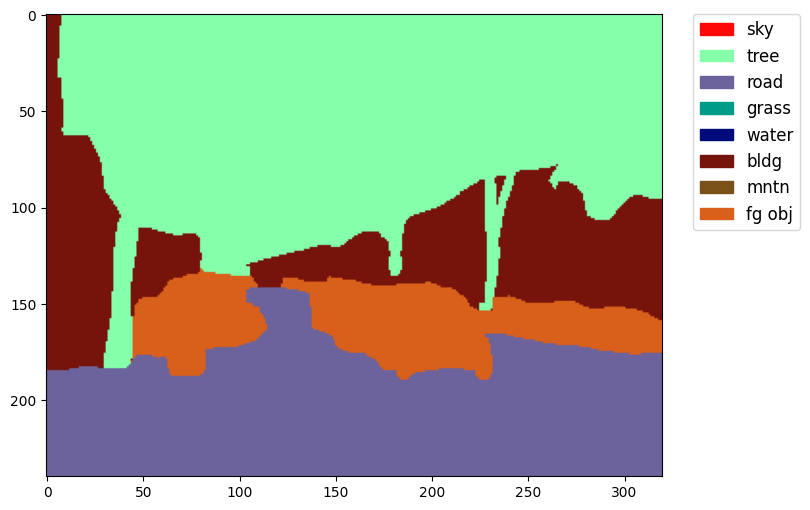

In [3]:
# Let's take a look at the segmentation map we got
import matplotlib.patches as mpatches
img = Image.open('/media/james/Works/Project/AI/SEGMENT/datasets/iccv09Data/labels/0000176.png')
plt.figure(figsize=(8, 6))
im = plt.imshow(np.array(img.convert('RGB')))

# create a patch (proxy artist) for every color 
patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

In [4]:
# split train/val set randomly
# split_dir = 'splits'
split_dir = '/media/james/Works/Project/AI/SEGMENT/mmsegmentation/demo/iccv09Data/splits'
mmengine.mkdir_or_exist(osp.join(data_root, split_dir))

filename_list = [osp.splitext(filename)[0] for filename in mmengine.scandir(
    osp.join(data_root, ann_dir), suffix='.png')]

with open(osp.join(data_root, split_dir, 'train.txt'), 'w') as f:
  # select first 4/5 as train set
  train_length = int(len(filename_list)*4/5)
  f.writelines(line + '\n' for line in filename_list[:train_length])
with open(osp.join(data_root, split_dir, 'val.txt'), 'w') as f:
  # select last 1/5 as val set
  f.writelines(line + '\n' for line in filename_list[train_length:])

After downloading the data, we need to implement `load_annotations` function in the new dataset class `StanfordBackgroundDataset`.

In [6]:
from mmseg.registry import DATASETS
from mmseg.datasets import BaseSegDataset


@DATASETS.register_module()
class StanfordBackgroundDataset(BaseSegDataset):
  METAINFO = dict(classes = classes, palette = palette)
  def __init__(self, **kwargs):
    super().__init__(img_suffix='.jpg', seg_map_suffix='.png', **kwargs)
    

KeyError: 'StanfordBackgroundDataset is already registered in dataset at __main__'

## Set up Config

In [7]:
config_file = '../configs/pspnet/pspnet_r50-d8_4xb2-40k_cityscapes-512x1024.py'
# checkpoint_file = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'
checkpoint_file = '/media/james/Works/Project/AI/SEGMENT/mmsegmentation/demo/work_dirs/tutorial/iter_200.pth'

In [8]:
from mmengine import Config
cfg = Config.fromfile(config_file)


In [10]:
# Since we use only one GPU, BN is used instead of SyncBN
cfg.norm_cfg = dict(type='BN', requires_grad=True)
cfg.crop_size = (256, 256)
cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head
cfg.model.decode_head.num_classes = 8
cfg.model.auxiliary_head.num_classes = 8

# Modify dataset type and path
cfg.dataset_type = 'StanfordBackgroundDataset'
cfg.data_root = data_root

# cfg.train_dataloader.batch_size = 8 #number of samples that will be propagated through the network.
cfg.train_dataloader.batch_size = 2 #number of samples that will be propagated through the network.



cfg.train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations'),
    dict(type='RandomResize', scale=(320, 240), ratio_range=(0.5, 2.0), keep_ratio=True),
    dict(type='RandomCrop', crop_size=cfg.crop_size, cat_max_ratio=0.75),
    dict(type='RandomFlip', prob=0.5),
    dict(type='PackSegInputs')
]

cfg.test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='Resize', scale=(320, 240), keep_ratio=True),
    # add loading annotation after ``Resize`` because ground truth
    # does not need to do resize data transform
    dict(type='LoadAnnotations'),
    dict(type='PackSegInputs')
]

val_train='/media/james/Works/Project/AI/SEGMENT/mmsegmentation/demo/iccv09Data/splits/'
cfg.train_dataloader.dataset.type = cfg.dataset_type
cfg.train_dataloader.dataset.data_root = cfg.data_root
cfg.train_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.train_dataloader.dataset.pipeline = cfg.train_pipeline
cfg.train_dataloader.dataset.ann_file = val_train+'train.txt'

cfg.val_dataloader.dataset.type = cfg.dataset_type
cfg.val_dataloader.dataset.data_root = cfg.data_root
cfg.val_dataloader.dataset.data_prefix = dict(img_path=img_dir, seg_map_path=ann_dir)
cfg.val_dataloader.dataset.pipeline = cfg.test_pipeline
cfg.val_dataloader.dataset.ann_file = val_train+'val.txt'

cfg.test_dataloader = cfg.val_dataloader


# Load the pretrained weights
cfg.load_from = checkpoint_file

# Set up working dir to save files and logs.
cfg.work_dir = './work_dirs/tutorial'

cfg.train_cfg.max_iters = 200
cfg.train_cfg.val_interval = 200
cfg.default_hooks.logger.interval = 10
cfg.default_hooks.checkpoint.interval = 200

# Set seed to facilitate reproducing the result
cfg['randomness'] = dict(seed=0)


In [82]:
from mmengine.runner import Runner
runner = Runner.from_cfg(cfg)

05/24 18:21:48 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.8.16 (default, Mar  2 2023, 03:21:46) [GCC 11.2.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: NVIDIA GeForce GTX 1050
    CUDA_HOME: /usr
    NVCC: Cuda compilation tools, release 10.1, V10.1.24
    GCC: gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.13.0+cu117
    PyTorch compiling details: PyTorch built with:
  - GCC 9.3
  - C++ Version: 201402
  - Intel(R) oneAPI Math Kernel Library Version 2023.1-Product Build 20230303 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.6.0 (Git Hash 52b5f107dd9cf10910aaa19cb47f3abf9b349815)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.7
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-genco

/mnt/B69AD3A69AD36183/miniconda3/envs/CV/lib/python3.8/site-packages/mmengine/utils/manager.py:113: UserWarning: <class 'mmseg.visualization.local_visualizer.SegLocalVisualizer'> instance named of visualizer has been created, the method `get_instance` should not accept any other arguments
  warnings.warn(
/media/james/Works/Project/AI/SEGMENT/mmsegmentation/demo/mmsegmentation/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '


05/24 18:21:54 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
05/24 18:21:54 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/media/james/Works/Project/AI/SEGMENT/mmsegmentation/demo/mmsegmentation/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


In [11]:
runner.train()

05/24 15:43:40 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
05/24 15:43:41 - mmengine - INFO - load model from: open-mmlab://resnet50_v1c
05/24 15:43:41 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet50_v1c
05/24 15:43:42 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

Loads checkpoint by local backend from path: ../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-0

Loads checkpoint by local backend from path: ../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth
The model and loaded state dict do not match exactly

size mismatch for decode_head.conv_seg.weight: copying a param with shape torch.Size([19, 512, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 512, 1, 1]).
size mismatch for decode_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).
size mismatch for auxiliary_head.conv_seg.weight: copying a param with shape torch.Size([19, 256, 1, 1]) from checkpoint, the shape in current model is torch.Size([8, 256, 1, 1]).
size mismatch for auxiliary_head.conv_seg.bias: copying a param with shape torch.Size([19]) from checkpoint, the shape in current model is torch.Size([8]).


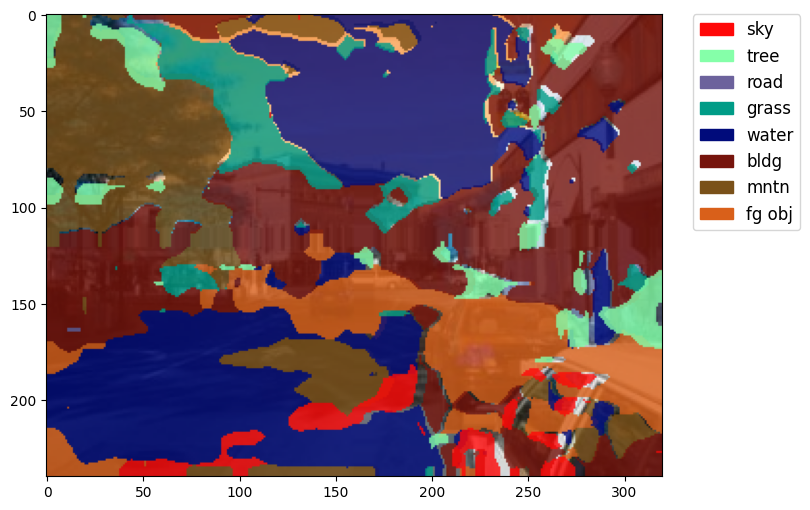

In [14]:
from mmseg.apis import init_model, inference_model, show_result_pyplot


checkpoint_path = '../checkpoints/pspnet_r50-d8_512x1024_40k_cityscapes_20200605_003338-2966598c.pth'

model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('iccv09Data/images/6000074.jpg')


result = inference_model(model, img)
vis_result = show_result_pyplot(model, img, result,opacity=0.8)


plt.figure(figsize=(8, 6))
# plt.imshow(mmcv.bgr2rgb(vis_result))
plt.imshow(vis_result)

patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()

Loads checkpoint by local backend from path: ./work_dirs/tutorial/iter_200.pth


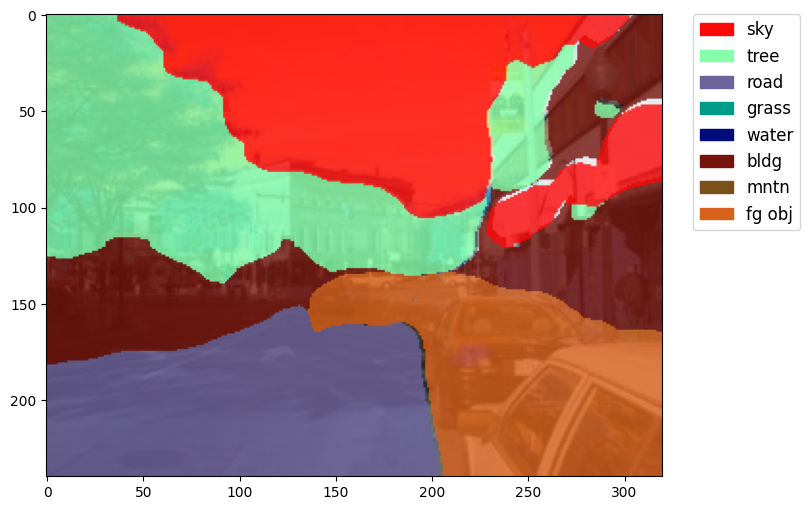

In [12]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

checkpoint_path = './work_dirs/tutorial/iter_200.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

img = mmcv.imread('iccv09Data/images/6000074.jpg')


result = inference_model(model, img)
vis_result = show_result_pyplot(model, img, result,opacity=0.8)


plt.figure(figsize=(8, 6))
# plt.imshow(mmcv.bgr2rgb(vis_result))
plt.imshow(vis_result)

patches = [mpatches.Patch(color=np.array(palette[i])/255., 
                          label=classes[i]) for i in range(8)]
# put those patched as legend-handles into the legend
plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., 
           fontsize='large')

plt.show()